## Extracting a Country's coordinates
Continuing from the last Notebook - **Country's bounded-Coordinates to Polygon-Objects**, we will now collect latitude-longitude points that lie within a country's geometry-shape.

Test Country: **United Arab Emirates**

Sneak-peak of our DF's middle 4 rows:


,iso_a3,polytype,geo
country,,,
South Korea,KOR,MultiPolygon,(POLYGON ((126.8233663710002 33.55943982600012...
Kosovo,-99,Polygon,"POLYGON ((20.86470015400005 43.21733734200004,..."
Kuwait,KWT,MultiPolygon,(POLYGON ((48.38111412900017 29.43398672100004...
Laos,LAO,Polygon,"POLYGON ((101.8679211830001 22.37884185800007,..."


Testing with -> United Arab Emirates:


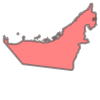

In [18]:
import numpy as np

# Loading the last saved dataframe 
geo_df = np.load('countries_geo.npy', allow_pickle=True).item()['df']
nrows = geo_df.shape[0]

UAE = geo_df.loc['United Arab Emirates']

print("Sneak-peak of our DF's middle 4 rows:")
display(geo_df.iloc[nrows//2 - 2 : nrows//2 + 2])

print(f"Testing with -> {UAE.name}:")
UAE.geo

Lets generate a **square-boundary**/box (of coordinates) from the bounds of our country, which can be used to extract coordinates that lie within our country.

(*bounds*: minimum and maximum latitudes and longitudes of our country's border)

In [51]:
minlng, minlat, maxlng, maxlat = UAE.geo.bounds

minmax_lats, minmax_lngs = [minlat, maxlat], [minlng, maxlng]
UAE_square_corners = [(x,y) for x in minmax_lats for y in minmax_lngs]

print(f"{UAE.name}'s Square-boundary corners: (border-box made around UAE)")
UAE_square_corners

United Arab Emirates's Square-boundary corners: (border-box made around UAE)


[(22.62094594300011, 51.56934655000006),
 (22.62094594300011, 56.383636915000096),
 (26.074791972000142, 51.56934655000006),
 (26.074791972000142, 56.383636915000096)]

### Plot a country's Geo-shape and Square-boundary box
Using Matplotlib, we will plot (as our title) to visualize our approach of extracting the country's inner-coordinates. Basically we will extract coordinates from the square-boundary box (**BLUE**) that make up our country's coordinates (in **GREEN**).  

United Arab Emirates's:
square-box (BLUE) and Geo-shape (GREEN)



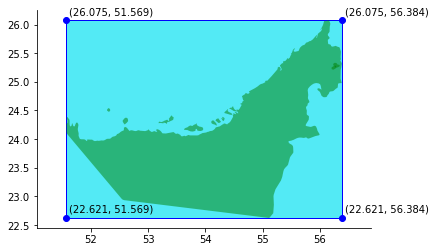

In [77]:
from matplotlib import patches, pyplot as plt

# Rectangle made by UAE's Square-boundary coordinates
UAE_sqaure = patches.Rectangle((minlng, minlat), #(left, bottom)
                                maxlng - minlng, #(width)
                                maxlat - minlat, #(height)
                                fc = "#53eaf5",  # Face color
                                ec = 'blue',     # Edge color 
                               )
# Making the main plot
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
axs.add_patch(UAE_sqaure) # Add UAE's Box/Square in the plot first

# Add UAE's Geo-shape in the plot (overlay over UAE-Box)
for geom in UAE.geo.geoms:    
    # x = Longitude, y = Latitude
    lngs_arr, lats_arr = geom.exterior.xy
    axs.fill(lngs_arr, lats_arr, alpha=0.5, fc='green', ec='none')

# Label the corners of UAE's Square/box
for lat, lng in UAE_square_corners:
#     plt.annotate(f'{round(lat,3), round(lng,3)}', xy=(lng, lat))
    axs.plot(lng, lat, 'bo')
    axs.text(lng+.05, lat+.1, f'{round(lat,3), round(lng,3)}')

# Remove the main plot's outlines (right and top)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False)
    
print(f"{UAE.name}'s:\n"+
      "square-box (BLUE) and Geo-shape (GREEN)\n")
plt.show()

### Coordinate-extraction time!

In [88]:
# Making a range of latitudes and longitudes (min to max) 
# with a difference of 0.001 between each point
square_lats = np.arange(*minmax_lats, 0.001)
square_lngs = np.arange(*minmax_lngs, 0.001)

# Generate combinations of our latitudes and longitudes 
square_coords = np.array(np.meshgrid(square_lngs, square_lats)).T.reshape(-1, 2)

print(f'Here are {len(square_coords):,} inner-coordinates'+
      " of UAE's Square-boundary:\n(in [lng, lat] form)" )
square_coords

Here are 16,631,010 inner-coordinates of UAE's Square-boundary:
(in [lng, lat] form)


array([[51.56934655, 22.62094594],
       [51.56934655, 22.62194594],
       [51.56934655, 22.62294594],
       ...,
       [56.38334655, 26.07194594],
       [56.38334655, 26.07294594],
       [56.38334655, 26.07394594]])

In [97]:
from shapely.geometry import Point

points_in_geo = lambda lnglat, geo: sum((lnglat))#Point(list(lnglat)).within(geo) 

# points_in_geo(square_coords, UAE.geo)


array([8.97681159e+08, 4.04922617e+08])

In [ ]:
def square_boundary(bounds, by_y=False):
    minmax_latlng = []
    square_corners = []
    for x in bounds:
        for y in bounds:
            if x != y: 
                xy = [x,y]
                
                if by_y:
                    xy = sorted(xy)
                
                if str(x)[0] != str(y)[0]:
                    square_corners.append(xy)
                else:
                    minmax_latlng.append(xy)
                    
    square_corners = sorted(square_corners)[::2]
    minmax_lat, minmax_lng = sorted(minmax_latlng)[::2]
    
    return {'corners': square_corners, 
            'minmax': {'lat':minmax_lat, 'lng':minmax_lng}}

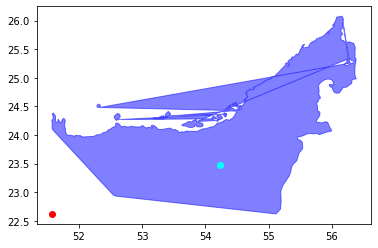

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

vts = np.array(polygon_allCoords)
pgon = patches.Polygon(vts, color="blue", alpha=0.5)

# 2 points defining a box
point1 = (51.57,22.62)
point2 = (54.2352365,23.4677)

# plot the polygon patch
fig,ax = plt.subplots()
ax.add_patch(pgon)

# plot points
ax.scatter(point1[0],point1[1], color="red", zorder=6)   # point1 inside
ax.scatter(point2[0],point2[1], color="aqua", zorder=6) # point2 outside

plt.show()

In [13]:
allUAE_square_coords

array([[51.568, 22.62 ],
       [51.568, 22.621],
       [51.568, 22.622],
       ...,
       [56.384, 26.073],
       [56.384, 26.074],
       [56.384, 26.075]])

In [14]:
# Check if the square-border points are inside the above UAE-polygon (inside blue)
pts_inside = pgon.contains_points(ax.transData.transform(allUAE_square_coords))

print(pts_inside) # [True False ...] output

[False False False ... False False False]


In [20]:
total_inpoints = sum(pts_inside)
f'{numstr(total_inpoints)} coordinates are inside the blue UAE-polygon (out of full plot of {numstr(len(allUAE_square_coords))} points)... {total_inpoints/len(allUAE_square_coords)*100}% of the plot.'

'6,590,119 coordinates are inside the blue UAE-polygon (out of full plot of 16,647,552 points)... 39.58611452302417% of the plot.'

In [22]:
actual_uae_coords = allUAE_square_coords[np.where(pts_inside)]
np.save('actual_uae_coords', actual_uae_coords, allow_pickle = True)

In [29]:
actual_uae_coords

array([[51.578, 24.253],
       [51.579, 24.247],
       [51.579, 24.248],
       ...,
       [56.375, 25.32 ],
       [56.375, 25.321],
       [56.375, 25.324]])